<a href="https://colab.research.google.com/github/juliadmytrenko/PokemonRecognizer/blob/main/PokemonRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cześć 🤠
Tworzę te prostą sieć, aby nauczyć się samej obrabiać dane i dostosywać hiperparametry.

Projekt ten polega na tym, aby rozpoznać czy dany pluszak/zabawka to któryś z dwóch pokemonów (Jigglypuff, Bulbasaur).

Jeżeli jest prawdopodobieństwo większe niż załóżmy 75%, wtedy uznaję, że warto przejrzeć daną ofertę z OLX, Allegro, eBay etc.

## Wczytywanie obrazków

- czy bibliotek do obrazów `Pillow` jest w stanie mi wczytać obrazek w formacie `jfif` ? Odp. TAK

In [1]:
!pip install pillow-avif-plugin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.6 MB/s eta 0:00:00


In [2]:
from PIL import Image
import pillow_avif # do wczytywania plików .avif
import os

module_path = "/content/drive/MyDrive/Życie/ml/pokemony"

# # importing the image
# img = Image.open("/content/drive/MyDrive/Życie/ml/pokemony/data/train/Jigglypuff/2.jfif")
# print("The size of the image before conversion : ", end = "")
# print(os.path.getsize("/content/drive/MyDrive/Życie/ml/pokemony/data/train/Jigglypuff/2.jfif"))

Teraz wczytujemy wszystkie obrazki.
Na razie nie zipuję obrazków, bo jest ich mało i nie mam potrzeby ich zipować, żeby mieć więcej miejsca na dysku, ale jak się zwiększy dataset to to zrobię lol aaaaaaaa

In [3]:
import zipfile
import os
from pathlib import Path
from google.colab import drive

# 1. Montowanie Google Drive'a
# drive.mount('/content/drive')

# 2. Definiowanie ścieżek
zip_file_path = f"{module_path}/data.zip" # Zmień na poprawną ścieżkę, nazwa chyba musi być ta sama co folderu na dole czyli data
extract_path = module_path # Ścieżka, gdzie chcesz wypakować pliki

# 3. Tworzenie folderu docelowego, jeśli nie istnieje
Path(extract_path).mkdir(parents=True, exist_ok=True)

# 4. Sprawdzenie, czy plik ZIP istnieje i wypakowanie go
try:
    if os.path.exists(zip_file_path):
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            print(f"Unpackng {zip_file_path}...")
            zip_ref.extractall(extract_path)
            print(f"Unpacked to {extract_path}")
    else:
        print(f"File not found: {zip_file_path}")
except zipfile.BadZipFile:
    print(f"Error: {zip_file_path} is not a correct ZIP file")
except Exception as e:
    print(f"Unexpected error: {e}")
# Remove zip file
# os.remove(data_path / "pokemony_data.zip") # nie usuwam, bo zamiast jak Daniel pobrać dane ze zdalnego repo to pobieram
# je bezpośrednio z mojego google drive

Unpackng /content/drive/MyDrive/Życie/ml/pokemony/data.zip...
Unpacked to /content/drive/MyDrive/Życie/ml/pokemony


In [4]:
from pathlib import Path
data_path = Path("/content/drive/MyDrive/Życie/ml")

image_path = data_path / "pokemony" / "data"

image_path_list = list(image_path.glob("*/*/*.*")) # wszystkie zdj z ml

# Setup train and testing paths
train_dir = image_path / "train"
dev_dir = image_path / "dev"
test_dir = image_path / "test"

train_dir

PosixPath('/content/drive/MyDrive/Życie/ml/pokemony/data/train')

In [5]:
# image_path_list

Zmienia strukture folderów na odpowiednią. Przechodzę do wczytywania obrazków poprzez defaultowy ImageFolder

In [6]:
import torch
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

42????? miało ich być 25. Coś jest nie tak. Wyświętlę wszystkie obrazki

## Skryptowanie
Tworzenie skryptu Datasets i Dataloaders.

- Używam magic command `%%writefile $filename`
- Użyję magiczną funkcję Jupyter'a do stworzenia pliku `.py`




In [7]:
#Create a directory pokemony scripts
import os
os.makedirs(f"{module_path}/pokemony/", exist_ok=True)

import sys #This means that Python will now be able to find and import modules located in that newly added directory.
sys.path.append(f'{module_path}/pokemony')

# Think of sys.path as a list of all the places Python looks when you try to import something.
# When you use import my_module, Python goes through this list,
# checking each directory for a file named my_module.py. If it finds it, it imports the module.

In [8]:
data_setup_filepath = Path(f"{module_path}/pokemony/data_setup.py")
data_setup_module = Path(f"{module_path}/pokemony/")

data_setup_module

PosixPath('/content/drive/MyDrive/Życie/ml/pokemony/pokemony')

In [9]:
writefile_data_setup = f"{module_path}/pokemony/data_setup.py"

In [10]:
%%writefile /content/drive/MyDrive/Życie/ml/pokemony/pokemony/data_setup.py
# %%writefile $writefile_data_setup
"""
Wczytuje dane do trenowania, walidacji? i testowania
"""

import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

NUM_WORKERS = os.cpu_count()

def create_dataloader(
    train_dir: str,
    dev_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int = NUM_WORKERS
):
  """
    Creates training and validating (dev) dataloaders
    Takes in a training directory and validating directory and
    turns them into Pytorch Dataset and then into PyTorch DataLoaders

    Args:
      train_dir: Path to training directory.
      test_dir: Path to testing directory.
      transform: torchvision transforms to perform on training and testing data.
      batch_size: Number of ........... TODO


    Returns:
      A tuple of (train_dataloader, test_dataloader, class_names)
      Where classnames is a list of the target classes.

    Example usage:
      ..............

  """

  train_data = datasets.ImageFolder(root=train_dir,
                                    transform=transform,
                                    target_transform=None) # transform for the target/label

  dev_data = datasets.ImageFolder(dev_dir,
                                  transform=transform,
                                  target_transform=None)

  # Setup the batch size hyperparameter
  BATCH_SIZE = batch_size

  # Turn datasets into iterables (batches)
  train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                shuffle=True,
                                num_workers=NUM_WORKERS,
                                pin_memory=True) # pin_memory pomaga GPU CUDA na szybsze obliczenia
  # for test data the order doesn't really matter because the model does not learn on test data


  # show 10 images
  for i, (image, label) in enumerate(random.choices(train_data, k=10)):
    plt.subplot(2, 5, i+1) # omg to było takie proste, ale lepiej wolno niż wcale co nie?
    plt.imshow(transforms.functional.to_pil_image(image, mode=None))
    plt.title(label)
    plt.axis("off")


  dev_dataloader = DataLoader(dataset=dev_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=NUM_WORKERS,
                              pin_memory=True)

  return train_dataloader, dev_dataloader, train_data.classes # jak nie ma brackets ( to też zwraca tuple domyślnie

Overwriting /content/drive/MyDrive/Życie/ml/pokemony/pokemony/data_setup.py


In [11]:
%%writefile /content/drive/MyDrive/Życie/ml/pokemony/pokemony/model_builder.py
"""
Contains PyTorch model code to instantiate a TinyVGG model.
"""
import torch
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int, device: str = "cpu"):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, # there's a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion = szybciej się liczy


Overwriting /content/drive/MyDrive/Życie/ml/pokemony/pokemony/model_builder.py


In [12]:
!pip install -q torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.8 MB/s eta 0:00:00


In [13]:
%%writefile /content/drive/MyDrive/Życie/ml/pokemony/pokemony/engine.py

import torch
from torch import nn

def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    device: torch.device = "cpu",
):
  train_loss, train_acc = 0, 0

  model.train()

  # Add a loop to loo[ through the training batches
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X) # outpus the raw logits from the model

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item() # accumulate train loss
    # train_acc += torchmetrics.functional.accuracy(y_pred.argmax(dim=1), y, task="multiclass", num_classes=num_classes)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimzer step
    optimizer.step()

    # Calculate accuracy metric INNA METODA
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)


  # Divide total train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  return train_loss, train_acc


def dev_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    device: torch.device = "cpu",
):
  dev_loss, dev_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      dev_pred_logits = model(X_test)
      # Calculate the loss (accumulatively)
      loss = loss_fn(dev_pred_logits, y_test)
      dev_loss += loss.item()
      # Calc acc
      # test_acc += torchmetrics.functional.accuracy(test_pred.argmax(dim=1), y_test, task="multiclass", num_classes=num_classes)
    # Calculate the accuracy
      dev_pred_labels = dev_pred_logits.argmax(dim=1)

      dev_acc += ((dev_pred_labels == y_test).sum().item()/len(dev_pred_labels))
    # calculate the test loss average per batch

  dev_loss /= len(data_loader)
  dev_acc /= len(data_loader)

  return dev_loss, dev_acc

from tqdm.auto import tqdm

def train(epochs: int,
          model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          dev_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          device: torch.device = "cpu",
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss()):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "dev_loss": [],
             "dev_acc": []}

  for epoch in tqdm(range(epochs)):
    # Add a loop to loop through the training batches

    train_loss, train_acc = train_step(
      model = model,
      data_loader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      device = device
    )

    dev_loss, dev_acc = dev_step(
      model = model,
      data_loader = dev_dataloader,
      loss_fn = loss_fn,
      device = device
    )

      # 4. Print out what's happening
    # print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | ")
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Dev loss: {dev_loss:.4f} | Dev acc: {dev_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["dev_loss"].append(dev_loss)
    results["dev_acc"].append(dev_acc)

  # 6. Return the filled results at the end of the epochs
  return results


Overwriting /content/drive/MyDrive/Życie/ml/pokemony/pokemony/engine.py


In [14]:
%%writefile /content/drive/MyDrive/Życie/ml/pokemony/pokemony/train.py
import torch
from torch import nn
from pathlib import Path
from torchvision import datasets, transforms
import argparse
import pandas as pd

import engine
import model_builder
import data_setup
import utils


device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup hyperparameters
# NUM_EPOCHS = 5
# BATCH_SIZE = 32
# HIDDEN_UNITS = 10
# LEARNING_RATE = 0.001


module_path = "/content/drive/MyDrive/Życie/ml/pokemony"

data_path = Path("/content/drive/MyDrive/Życie/ml")

image_path = data_path / "pokemony" / "data"

image_path_list = list(image_path.glob("*/*/*.*")) # wszystkie zdj z ml

# Setup train and testing paths
train_dir = image_path / "train"
dev_dir = image_path / "dev"
test_dir = image_path / "test"

data_transform = transforms.Compose([
  # Resize our images
  transforms.Resize(size=(64, 64)),
  # Flip the images randomly on the horizontal
  transforms.RandomHorizontalFlip(p=0.5),
  # Turn the image into a torch.Tensor
  transforms.ToTensor()
])


parser = argparse.ArgumentParser(description='It trains a model with PyTorch.')

parser.add_argument('--num_epochs', type=int, default=5, help='Liczba epok do trenowania modelu.')
parser.add_argument('--hidden_units', type=int, default=10, help='Liczba ukrytych jednostek w modelu.')
parser.add_argument('-lr','--learning_rate', type=float, default=0.001, help='Współczynnik uczenia.')
parser.add_argument('--batch_size', type=int, default=8, help='Size of single batch.')
parser.add_argument('--model_name', type=str, default="PokemonRecognizer", help='Name of a model to be saved.')

parser.add_argument('--train_dir', type=str, default=train_dir, help='Path to directory with data to train.')
parser.add_argument('--dev_dir', type=str, default=dev_dir, help='Path to directory with data to validate.')
parser.add_argument('--input_shape', type=int, default=3, help='Size of an input shape')
parser.add_argument('--seed', type=int, default=42, help='Seed for randomization')
parser.add_argument('--device', type=str, default=device, help='Device on which to compute.')
# parser.add_argument('-lr','--data_transform', type=float, default="basic", help='Współczynnik uczenia.') # to nie wiem jak dodać

args = parser.parse_args()

train_dir = args.train_dir
dev_dir = args.dev_dir
data_transform = data_transform # na razie jeszcze nie ekperymentuje z transforms
input_shape = args.input_shape
hidden_units = args.hidden_units
lr = args.learning_rate
num_epochs = args.num_epochs
batch_size: int = args.batch_size
device = args.device
seed = args.seed
model_name = args.model_name


train_dataloader, dev_dataloader, classes = data_setup.create_dataloader(train_dir, dev_dir, transform=data_transform, batch_size=batch_size)
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = num_epochs

# Recreate an instance of TinyVGG
model = model_builder.TinyVGG(input_shape=input_shape, # number of color channels of our target images
                              hidden_units=hidden_units,
                              output_shape=len(classes))

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                            lr=lr)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model
model_results = engine.train(model=model,
                              train_dataloader=train_dataloader,
                              dev_dataloader=dev_dataloader,
                              optimizer=optimizer,
                              loss_fn=loss_fn,
                              epochs=NUM_EPOCHS,
                              device=device)


model_results["num_epochs"] = num_epochs
model_results["batch_size"] = batch_size
model_results["hidden_units"] = hidden_units

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

# display loss and accuracy curves
# utils.plot_loss_curves(model_results) # nie wyświetli się w Colab ten wykres

# Saving model
MODEL_SAVE_PATH_DIR = f"{module_path}/models"
utils.save_model(model=model, target_dir=MODEL_SAVE_PATH_DIR,
                model_name = model_name)

df = pd.DataFrame(model_results)
df.to_csv(f"{module_path}/models/{model_name}_results.csv", index=False)

Overwriting /content/drive/MyDrive/Życie/ml/pokemony/pokemony/train.py


In [15]:
%%writefile /content/drive/MyDrive/Życie/ml/pokemony/pokemony/utils.py
"""
Contains various utility functions for PyTorch model training and saving.
"""
from pathlib import Path
import matplotlib.pyplot as plt
from typing import Tuple, Dict, List, Union
import random

import torch

def save_model(model: torch.nn.Module,
               target_dir: str,
               model_name: str):
    """Saves a PyTorch model to a target directory.

    Args:
    model: A target PyTorch model to save.
    target_dir: A directory for saving the model to.
    model_name: A filename for the saved model. Should include
      either ".pth" or ".pt" as the file extension.

    Example usage:
    save_model(model=model,
               target_dir="models",
               model_name="05_going_modular_tingvgg_model.pth")
    """
    # Create target directory
    target_dir_path = Path(target_dir)
    target_dir_path.mkdir(parents=True,
                        exist_ok=True)

    # Create model save path
    assert model_name.endswith(".pth") or model_name.endswith(".pt"), "model_name should end with '.pt' or '.pth'"
    model_save_path = target_dir_path / model_name

    # Save the model state_dict()
    print(f"[INFO] Saving model to: {model_save_path}")
    torch.save(obj=model.state_dict(),
             f=model_save_path)

def print_train_time(start: float,
                    end: float,
                    device: torch.device=None):
  """Prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


def plot_loss_curves(results: Dict[str, Union[str, List[float]]], model_name: str = "model", ):
  """Plots training curves of a result dictionary."""
  # Get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["dev_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["dev_acc"]

  #Figure out how many epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))
  plt.suptitle(model_name) # to dodałam sama
  # Dodanie tekstu pod supertytułem
  info = (
  f"num_epochs: {results['num_epochs'][0]} | "
  f"batch_size: {results['batch_size'][0]} | "
  f"hidden_units: {results['hidden_units'][0]}"
  )
  plt.gcf().text(0.5, 0.94, info, ha='center', fontsize=10)

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="dev_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="dev_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

  plt.show()

# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = False,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shoudn't be larger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, weight] -> [height, weight, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Actual class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
      plt.title(title)


Overwriting /content/drive/MyDrive/Życie/ml/pokemony/pokemony/utils.py


In [16]:
img = Image.open(f"{module_path}/data/train/Bulbasaur/19.jpg")
img.show()  # Or img.verify() to check without opening

# Po treningu...

JUŻ ZA PIERWSZYM ODPALENIEM MAM JUŻ ACC na 93% procent train, to dobrze.

Teraz zobaczyć czy nie jest przetrenowany dataset czyli dodać test set. Test set to na razie będzie 10 przykładów.

OMG dodałam 10 przykładów dla każdej klasy czyli łącznie 20zdj
i mam genialne wyniki:
100% acc dla train test i 95% dla test set. Teraz zapiszę model i podam już wytrenowanemu modelowi różne samples z neta.

te wyniki otrzymałam z tą samą konfiguracją co w Digits czyli klasyczny TinyVGG i ustawiłam idealnie na 20 epok.

## Wyświtlanie losowych obrazków z test data
Wyświetlanie randomowych przykładów BEZ przewidywąń

['Bulbasaur', 'Jigglypuff', 'Others']

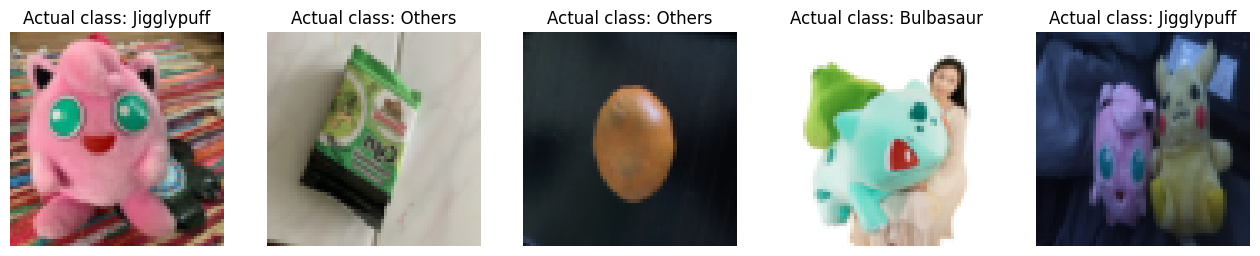

In [17]:
import utils

data_path = Path("/content/drive/MyDrive/Życie/ml")
image_path = data_path / "pokemony" / "data"
test_dir = image_path / "test"

test_data = datasets.ImageFolder(root=test_dir,
                                   transform=data_transform,
                                   target_transform=None) # transform for the target/label

utils.display_random_images(dataset=test_data,
                            n=5,
                            classes=test_data.classes)

test_data.classes

## Testowanie i odpalanie skryptów

W research overfitting wyszły mi takie dobre wyniki, bo łatwo jest rozróżnić te pokemony, już po samych kolorach, a jak zadziałą na nowe podobne pokemony?

Let's find out.

In [18]:
!pip install -q colorama

In [19]:
!pip install -q torchmetrics

In [20]:
%%writefile /content/drive/MyDrive/Życie/ml/pokemony/pokemony/predict.py
import os
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from colorama import Fore, Back, Style
import torchmetrics
import argparse
import model_builder

parser = argparse.ArgumentParser(description='It trains a model with PyTorch.')

parser.add_argument('--test_dir', type=str, default="/content/drive/MyDrive/Życie/ml/pokemony/data/test", help='Path to test data')
parser.add_argument('--model_name', type=str, default="PokemonRecognizer.pth", help='Name of a model to test.')

args = parser.parse_args()

test_dir = args.test_dir # tu może być 1 obrazek albo wiele, ale batch_size jest ustawione na 1, więc przy dużej ilości będzie bardzo wolno działało
model_name = args.model_name

data_transform = transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    # transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

test_data = datasets.ImageFolder(root=test_dir,
                                   transform=data_transform,
                                   target_transform=None) # transform for the target/label


BATCH_SIZE=1

 # dla testowych
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

num_classes = len(test_data.classes)
# Definiujemy kilka metryk jednocześnie
metrics = torchmetrics.MetricCollection({
    "Accuracy": torchmetrics.Accuracy(task="multiclass", num_classes=num_classes),
    "Precision": torchmetrics.Precision(task="multiclass", num_classes=num_classes),
    "Recall": torchmetrics.Recall(task="multiclass", num_classes=num_classes),
    "F1-score": torchmetrics.F1Score(task="multiclass", num_classes=num_classes),
})

confusion_matrix = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=num_classes).to(device) #jak wyświetlić confision matrix?


loaded_model = model_builder.TinyVGG(input_shape=3,
                                    hidden_units=20, # try changing this to 128 and seeing what happens
                                    output_shape=3)

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load in the saved state_dict()

module_path = "/content/drive/MyDrive/Życie/ml/pokemony"

MODEL_SAVE_PATH_FILE = f"{module_path}/models/{model_name}" # DLA 3! wyświetlam
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH_FILE))

# Send model to GPU
loaded_model_2 = loaded_model.to(device)

import matplotlib.pyplot as plt
# plt.figure(figsize=(6, 3))
def test():

  # Setup loss function and optimizer
  loss_fn = nn.CrossEntropyLoss()
  test_loss = 0
  test_acc = 0

  loaded_model_2.eval()
  with torch.inference_mode():
    for (X, y) in test_dataloader:
      # plt.figure(figsize=(10, 10))
      # plt.subplot(4,2, batch+1)

      logits = loaded_model_2(X.to(device))
      preds = logits.softmax(dim=1)
      label_number = preds.argmax(dim=1)
      # predicted_label = test_data.classes[label_number]
      confusion_matrix.update(preds, y)
      # actual_label = test_data.classes[y.item()]
      loss = loss_fn(logits, y)
      test_loss += loss.item()
      # Calc acc
      # test_acc += torchmetrics.functional.accuracy(test_pred.argmax(dim=1), y_test, task="multiclass", num_classes=num_classes)
      # Calculate the accuracy
      test_pred_labels = logits.argmax(dim=1)

      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
      # calculate the test loss average per batch

  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)


  final_matrix = confusion_matrix.compute()

  return test_loss, test_acc, final_matrix


      # preds_str = preds.cpu().numpy()
      # print(f"wtf: {preds_str[0][0]}")
      # print(f"Predicted: {predicted_label}, True label: {actual_label} | preds {Fore.GREEN + str(round( preds_str[0][0]*100, 2 ))}%, {Fore.MAGENTA + str(round(preds_str[0][1]*100, 2))}%, {Fore.BLUE + str(round( preds_str[0][2]*100, 2 ))}%")
      # print(Style.RESET_ALL)
      # W SKRYPCIE NIE WYŚWIETLĘ OBRAZKA, wykresy się generują z zapisanego
      # image = torchvision.transforms.functional.to_pil_image(X.squeeze(0), mode=None)
      # # image = X.squeeze(0).permute(2,1,0)
      # plt.imshow(image)
      # plt.title(f"Predicted: {predicted_label}")
      # plt.axis("off")
      # plt.show()

      # print("\n\n")
# Pobranie końcowej macierzy

test_loss, test_acc, final_matrix = test()



print(f"Test loss: {round(test_loss, 2)} | Test accuracy: {round(test_acc, 2)*100}%")
print(final_matrix)

Overwriting /content/drive/MyDrive/Życie/ml/pokemony/pokemony/predict.py


In [21]:
### Tutaj testuje na "PokemonRecognizer" <--- be żadnych numerków ;)
!python /content/drive/MyDrive/Życie/ml/pokemony/pokemony/train.py --model_name "PokemonRecognizer.pth" --num_epochs 32 --hidden_units 20

  0% 0/32 [00:00<?, ?it/s]Epoch: 0 | Train loss: 1.0963 | Train acc: 0.3594 | Dev loss: 1.1454 | Dev acc: 0.2812
  3% 1/32 [00:04<02:10,  4.21s/it]Epoch: 1 | Train loss: 1.0801 | Train acc: 0.2969 | Dev loss: 1.1874 | Dev acc: 0.2812
  6% 2/32 [00:08<02:02,  4.10s/it]Epoch: 2 | Train loss: 1.0348 | Train acc: 0.4844 | Dev loss: 1.1662 | Dev acc: 0.2812
  9% 3/32 [00:11<01:53,  3.92s/it]Epoch: 3 | Train loss: 0.9968 | Train acc: 0.4688 | Dev loss: 1.1981 | Dev acc: 0.2812
 12% 4/32 [00:15<01:43,  3.68s/it]Epoch: 4 | Train loss: 1.0758 | Train acc: 0.3594 | Dev loss: 1.0858 | Dev acc: 0.4688
 16% 5/32 [00:20<01:51,  4.12s/it]Epoch: 5 | Train loss: 1.0252 | Train acc: 0.7188 | Dev loss: 1.1332 | Dev acc: 0.2812
 19% 6/32 [00:23<01:39,  3.84s/it]Epoch: 6 | Train loss: 0.9760 | Train acc: 0.4844 | Dev loss: 1.1671 | Dev acc: 0.5625
 22% 7/32 [00:26<01:32,  3.68s/it]Epoch: 7 | Train loss: 0.9273 | Train acc: 0.7188 | Dev loss: 0.9351 | Dev acc: 0.6875
 25% 8/32 [00:30<01:27,  3.65s/it]Epoch:

## Uruchomienie modelu z poziomu skryptu

Ważne do zapamiętania:
*   Nie wyświetlisz obrazków ani wykresów z poziomu skryptu
*   Zapisuj wyniki skryptu do pliku, z którego potem będziesz mogła utworzyć wykresy




In [22]:
!python /content/drive/MyDrive/Życie/ml/pokemony/pokemony/predict.py --model_name "PokemonRecognizer.pth"

Traceback (most recent call last):
  File "/content/drive/MyDrive/Życie/ml/pokemony/pokemony/predict.py", line 51, in <module>
    confusion_matrix = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=num_classes).to(device) #jak wyświetlić confision matrix?
                                                                                                   ^^^^^^
NameError: name 'device' is not defined


In [23]:
# !python /content/drive/MyDrive/Życie/ml/pokemony/pokemony/train.py --model_name "PokemonRecognizer1.pth" --num_epochs 16

In [24]:
# !python /content/drive/MyDrive/Życie/ml/pokemony/pokemony/train.py --model_name "PokemonRecognizer2.pth" --num_epochs 16 --hidden_units 20

In [25]:
# !python /content/drive/MyDrive/Życie/ml/pokemony/pokemony/train.py --model_name "PokemonRecognizer3.pth" --num_epochs 32 --hidden_units 20

In [26]:
# !python /content/drive/MyDrive/Życie/ml/pokemony/pokemony/train.py --model_name "PokemonRecognizer4.pth" --num_epochs 64 --hidden_units 20 --batch_size 16

### Wykresy kosztu i dokładności dla każdego zapisanego modelu

oraz wyniki w tabeli dla każdego modelu

model_name: PokemonRecognizer.pth


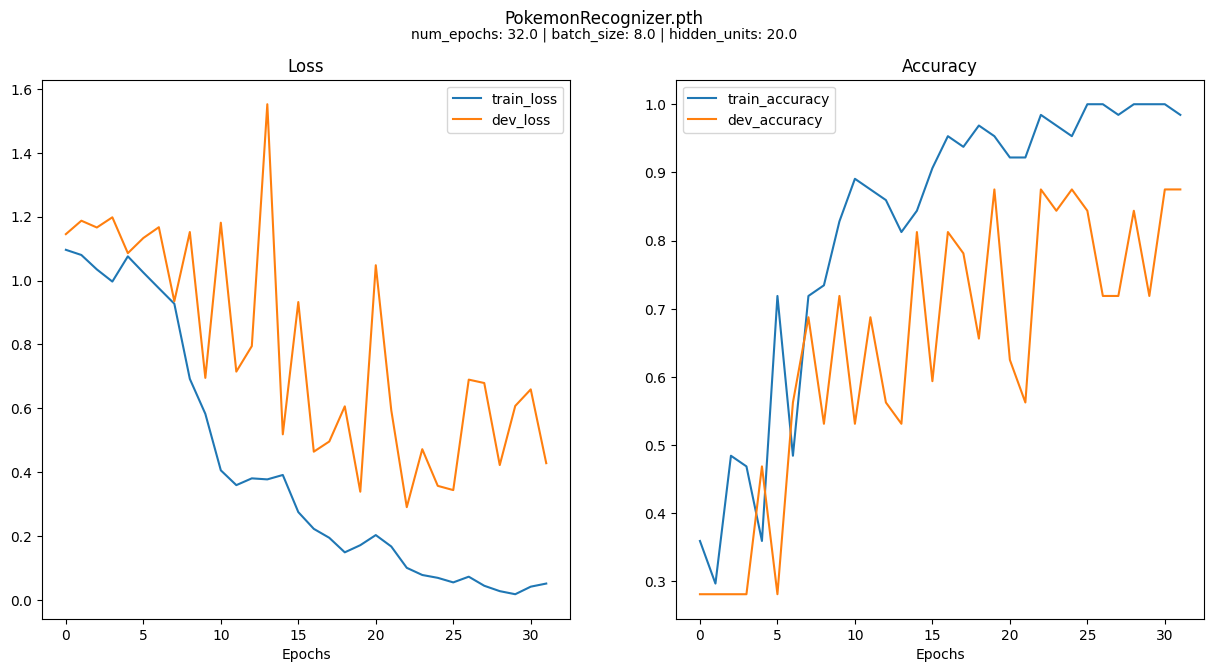

model_name: PokemonRecognizer1.pth


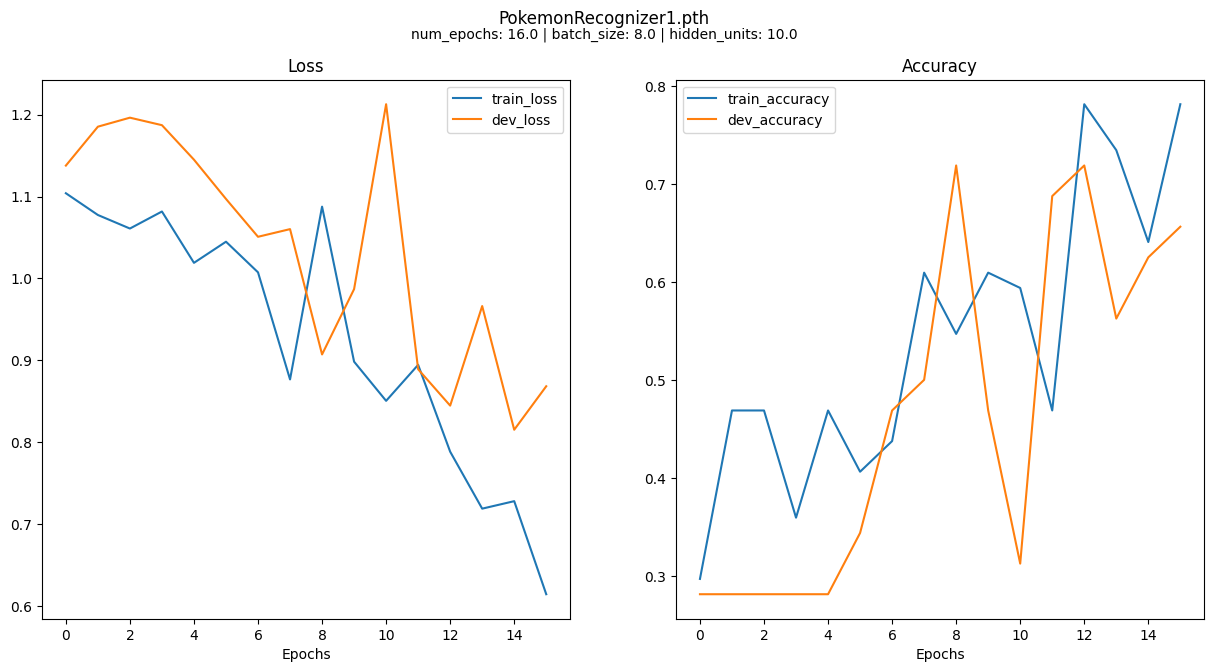

model_name: PokemonRecognizer2.pth


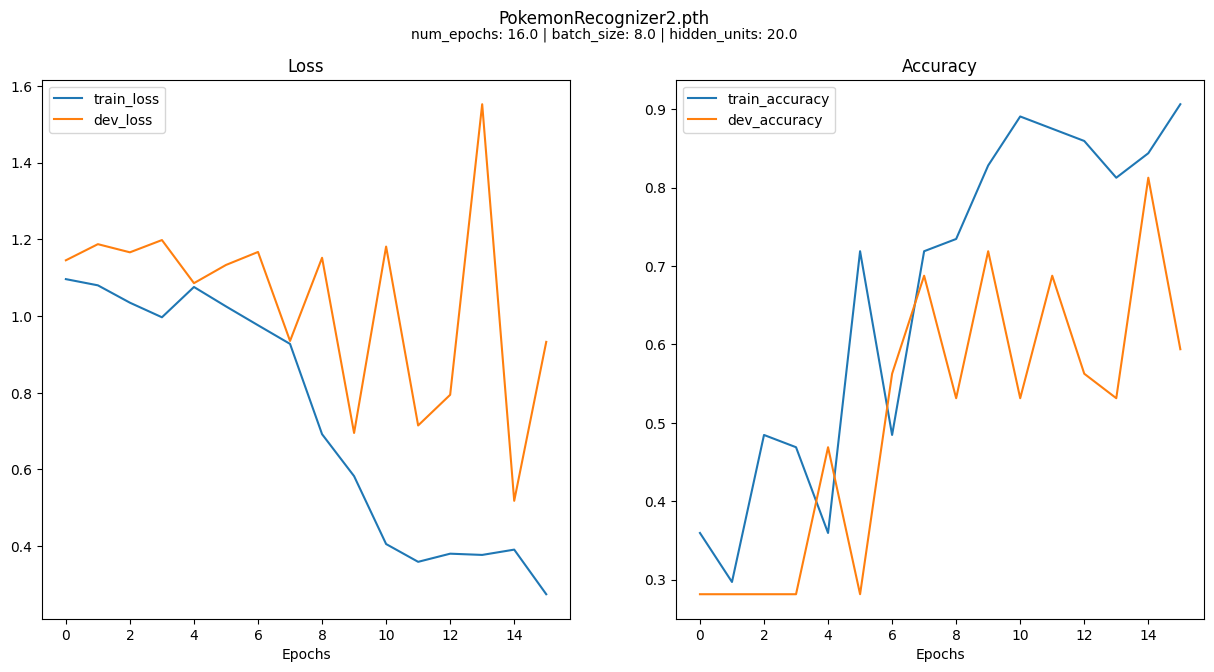

model_name: PokemonRecognizer3.pth


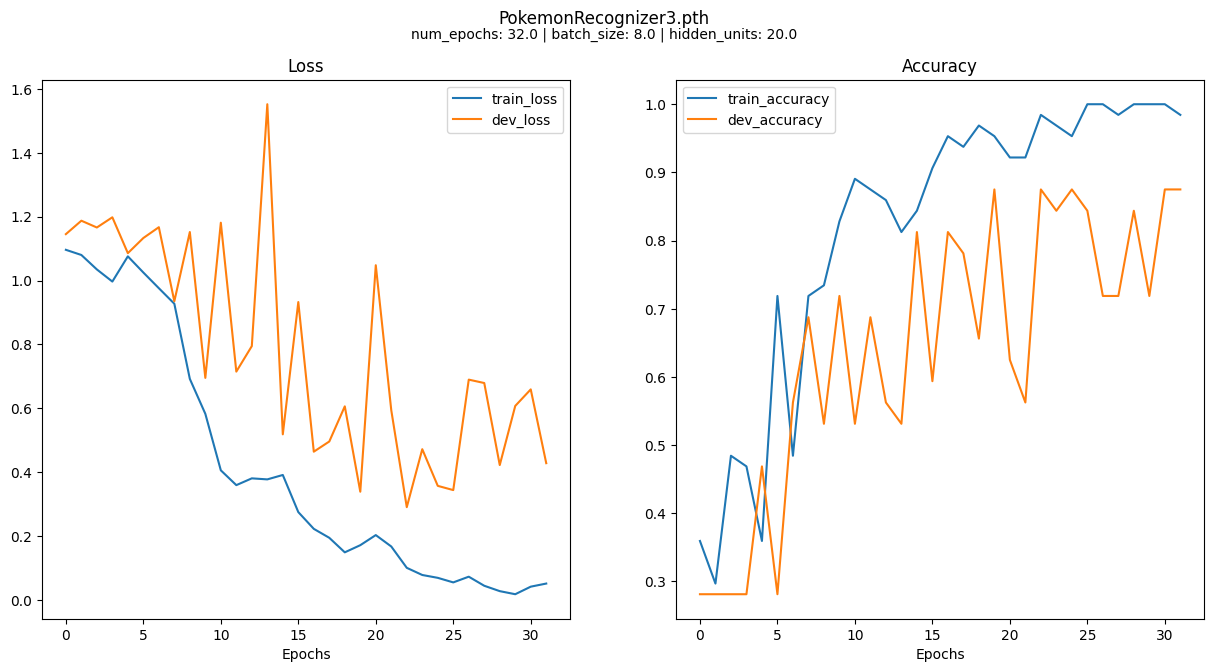

In [27]:
from typing import Dict, List
import pandas as pd
import utils

def csv_to_dict_list(file_path: str) -> Dict[str, List[float]]:
  """
  Wczytuje plik CSV i konwertuje go do formatu Dict[str, List[float]].
  """
  df = pd.read_csv(file_path)

  # Inicjalizacja słownika wyników
  result_dict: Dict[str, List[float]] = {}

  # Iteracja po kolumnach
  for column in df.columns:
      # Konwersja kolumny do listy floatów
      result_dict[column] = df[column].astype(float).tolist()

  return result_dict


# model_name = "PokemonRecognizer.pth"
model_names = ["PokemonRecognizer.pth",
               "PokemonRecognizer1.pth",
               "PokemonRecognizer2.pth",
               "PokemonRecognizer3.pth"]

for model_name in model_names:
  file_path = f'{module_path}/models/{model_name}_results.csv'  # Zmień na ścieżkę do swojego pliku

  # wyświetlanie wyników kończowych dla wszystkich trenowanych modeli
  model_results = csv_to_dict_list(file_path)
  print(f"model_name: {model_name}")
  utils.plot_loss_curves(results=model_results, model_name=model_name)


In [28]:
import pandas as pd
import os

pd.options.display.width = 150 # w rpincie nie będzie zawijało kolumn

model_names = ["PokemonRecognizer.pth",
               "PokemonRecognizer1.pth",
               "PokemonRecognizer2.pth",
               "PokemonRecognizer3.pth"]  # Replace with your model names.
module_path = "/content/drive/MyDrive/Życie/ml/pokemony"

all_tails = []
row_names = []  # List to store model names for row indexing

for model_name in model_names:
    file_path = f'{module_path}/models/{model_name}_results.csv'
    try:
        model_df = pd.read_csv(file_path)
        tail_df = model_df.tail(1)
        all_tails.append(tail_df)
        row_names.append(model_name)  # Add model name to the row names list
    except FileNotFoundError:
        print(f"File not found: {file_path}")

if all_tails:
    final_table = pd.concat(all_tails, ignore_index=True)
    final_table.index = row_names  # Set the index (row names)
    final_table = final_table.to_string(formatters={
    'train_acc': '{:,.2%}'.format,
    'dev_acc': '{:,.2%}'.format,
    })
    print(final_table)
else:
    print("No data was found")


                        train_loss train_acc  dev_loss dev_acc  num_epochs  batch_size  hidden_units
PokemonRecognizer.pth     0.050807    98.44%  0.427883  87.50%          32           8            20
PokemonRecognizer1.pth    0.614889    78.12%  0.868570  65.62%          16           8            10
PokemonRecognizer2.pth    0.274646    90.62%  0.932629  59.38%          16           8            20
PokemonRecognizer3.pth    0.050807    98.44%  0.427883  87.50%          32           8            20


In [29]:
import torchvision
# Download cutom image
import requests

# Setup cutom image path
custom_image_path = image_path / "test"/ "Others" / "jirachi.jpg"


data_transform_sample = transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64, 64)),
    # Turn the image into a torch.Tensor
    transforms.ToTensor(),
])
device = "cuda" if torch.cuda.is_available() else "cpu"

custom_image_uint8 = torchvision.io.read_image(custom_image_path)
custom_image_PIL = transforms.functional.to_pil_image(custom_image_uint8, mode=None)
# custom_image_uint8 = custom_image_uint8.type(torch.float32) / 255
custom_image_transformed = data_transform_sample(custom_image_PIL).to(device)
custom_image_transformed_with_batch = custom_image_transformed.unsqueeze(0)

In [30]:
import model_builder

loaded_model = model_builder.TinyVGG(input_shape=3,
                                    hidden_units=20, # try changing this to 128 and seeing what happens
                                    output_shape=3)

MODEL_SAVE_PATH_FILE = f"{module_path}/models/PokemonRecognizer.pth" # DLA 3! wyświetlam
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH_FILE))

# Send model to GPU
loaded_model = loaded_model.to(device)

In [31]:
loaded_model.eval()
with torch.inference_mode():
  y_logits = loaded_model(custom_image_transformed_with_batch)
  y_preds = y_logits.softmax(dim=1)
  y_label = test_data.classes[y_preds.argmax(dim=1)]


# print(y_preds)

tensor([[1.7935e-04, 7.1187e-05, 9.9975e-01]])


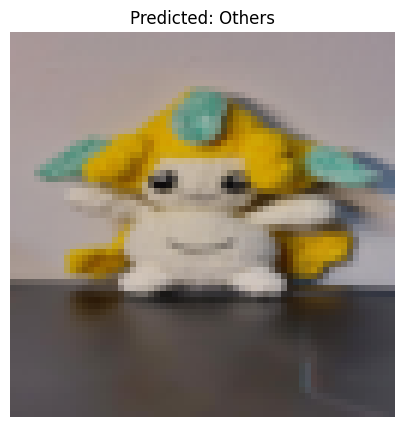

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.imshow(custom_image_transformed.permute(1,2,0).cpu().numpy())
plt.axis("off")
plt.title(f"Predicted: {y_label}")
print(y_preds.cpu())
plt.show()

# Testowanie bez skryptów

Aby wyświetlały dzię wyniki i wykresy z wynikami

In [33]:
import os
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from colorama import Fore, Back, Style
import torchmetrics
import argparse
import model_builder



test_dir = test_dir # tu może być 1 obrazek albo wiele, ale batch_size jest ustawione na 1, więc przy dużej ilości będzie bardzo wolno działało
model_name = "PokemonRecognizer.pth"

data_transform = transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    # transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

test_data = datasets.ImageFolder(root=test_dir,
                                   transform=data_transform,
                                   target_transform=None) # transform for the target/label




Predicted: Bulbasaur, True label: Bulbasaur | preds 96.35%, 1.22%, 2.43%



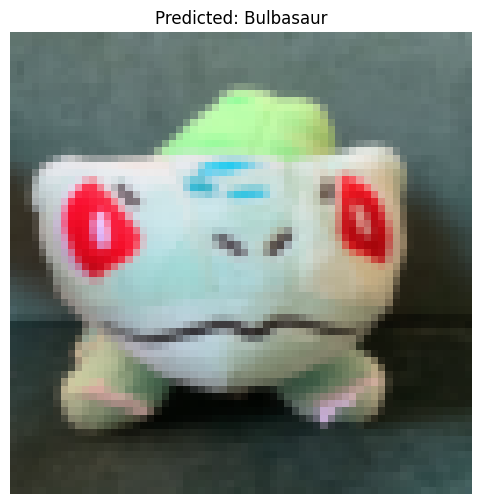




Predicted: Bulbasaur, True label: Bulbasaur | preds 98.77%, 1.23%, 0.0%



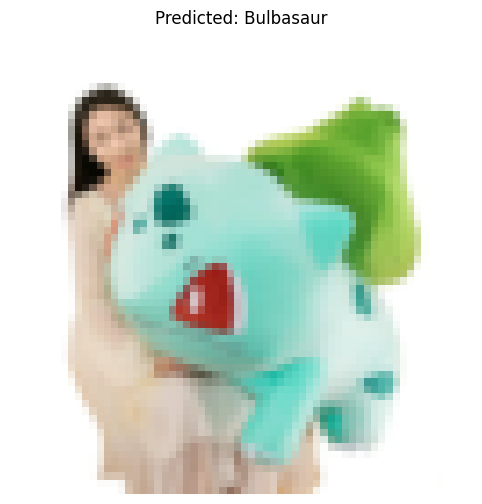




Predicted: Jigglypuff, True label: Bulbasaur | preds 41.86%, 57.37%, 0.77%



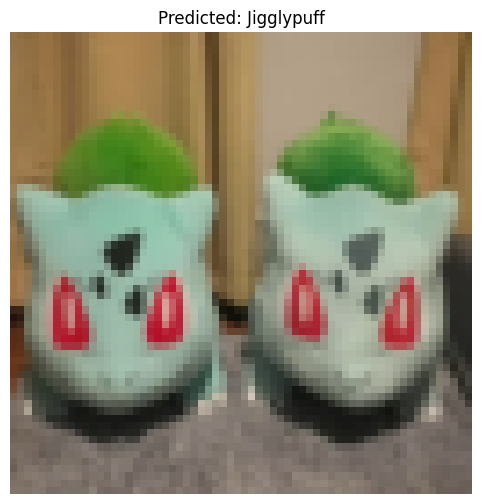




Predicted: Jigglypuff, True label: Jigglypuff | preds 0.0%, 99.45%, 0.55%



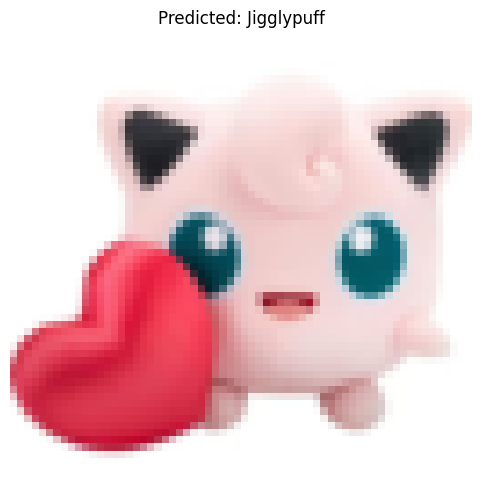




Predicted: Jigglypuff, True label: Jigglypuff | preds 0.0%, 99.92%, 0.08%



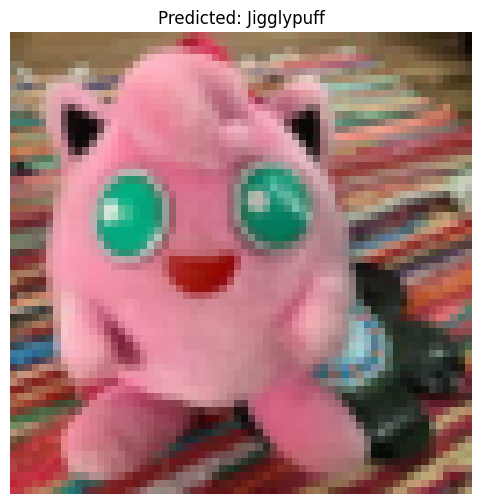




Predicted: Others, True label: Jigglypuff | preds 0.01%, 0.0%, 99.98%



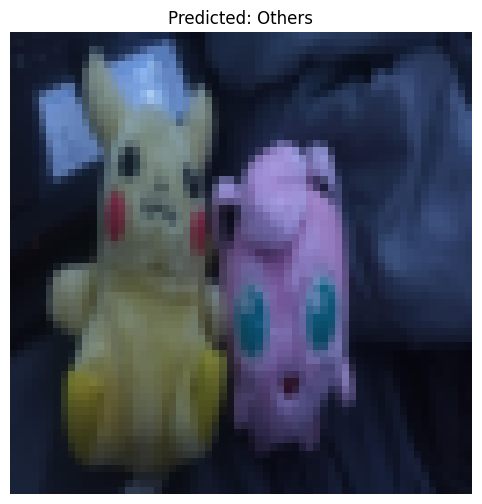




Predicted: Others, True label: Others | preds 0.0%, 0.0%, 100.0%



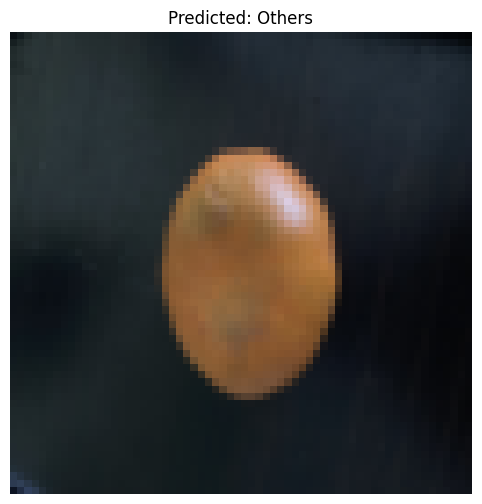




Predicted: Others, True label: Others | preds 0.0%, 13.75%, 86.25%



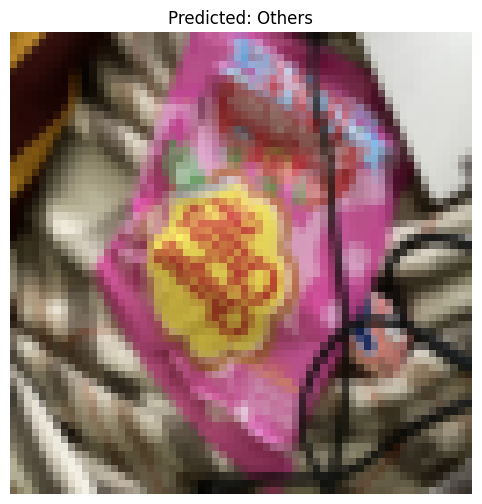




Predicted: Others, True label: Others | preds 0.55%, 0.12%, 99.33%



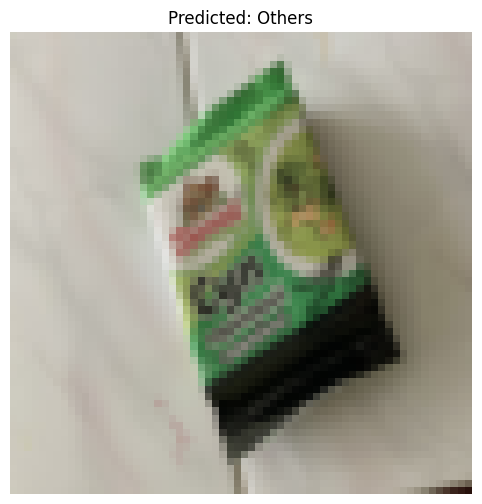




Predicted: Others, True label: Others | preds 0.02%, 0.01%, 99.97%



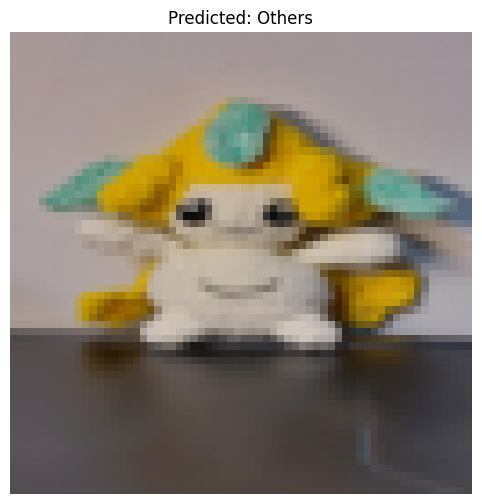




Predicted: Others, True label: Others | preds 0.0%, 0.76%, 99.24%



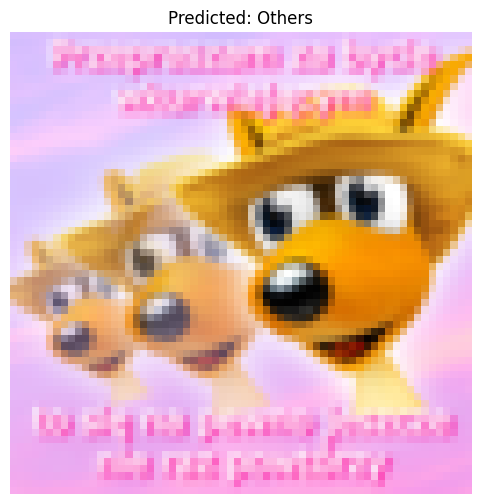




Test loss: 1.0 | Test accuracy: 82.0%
tensor([[2, 1, 0],
        [0, 2, 1],
        [0, 0, 5]])


In [34]:
BATCH_SIZE=1

 # dla testowych
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

num_classes = len(test_data.classes)
# Definiujemy kilka metryk jednocześnie
metrics = torchmetrics.MetricCollection({
    "Accuracy": torchmetrics.Accuracy(task="multiclass", num_classes=num_classes),
    "Precision": torchmetrics.Precision(task="multiclass", num_classes=num_classes),
    "Recall": torchmetrics.Recall(task="multiclass", num_classes=num_classes),
    "F1-score": torchmetrics.F1Score(task="multiclass", num_classes=num_classes),
})

# Set the device correctly before creating the confusion matrix
device = "cuda" if torch.cuda.is_available() else "cpu"

confusion_matrix = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=num_classes).to(device) #jak wyświetlić confision matrix?


loaded_model = model_builder.TinyVGG(input_shape=3,
                                    hidden_units=20, # try changing this to 128 and seeing what happens
                                    output_shape=3)



# Load in the saved state_dict()

MODEL_SAVE_PATH_FILE = f"{module_path}/models/{model_name}" # DLA 3! wyświetlam
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH_FILE))

# Send model to GPU
loaded_model = loaded_model.to(device)

import matplotlib.pyplot as plt
# plt.figure(figsize=(6, 3))
def test():

  # Setup loss function and optimizer
  loss_fn = nn.CrossEntropyLoss()
  test_loss = 0
  test_acc = 0

  loaded_model.eval()
  with torch.inference_mode():
    for (X, y) in test_dataloader:
      # plt.figure(figsize=(10, 10))
      # plt.subplot(4,2, batch+1)

      X, y = X.to(device), y.to(device) # Move inputs to the same device as the model and metrics

      logits = loaded_model(X)
      preds = logits.softmax(dim=1)
      label_number = preds.argmax(dim=1)
      predicted_label = test_data.classes[label_number]
      confusion_matrix.update(preds, y)
      actual_label = test_data.classes[y.item()]
      loss = loss_fn(logits, y)
      test_loss += loss.item()
      # Calc acc
      # test_acc += torchmetrics.functional.accuracy(test_pred.argmax(dim=1), y_test, task="multiclass", num_classes=num_classes)
      # Calculate the accuracy
      test_pred_labels = logits.argmax(dim=1)

      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
      # calculate the test loss average per batch


      preds_str = preds.cpu().numpy()
      # print(f"wtf: {preds_str[0][0]}")
      print(f"Predicted: {predicted_label}, True label: {actual_label} | preds {Fore.GREEN + str(round( preds_str[0][0]*100, 2 ))}%, {Fore.MAGENTA + str(round(preds_str[0][1]*100, 2))}%, {Fore.BLUE + str(round( preds_str[0][2]*100, 2 ))}%")
      print(Style.RESET_ALL)
      # W SKRYPCIE NIE WYŚWIETLĘ OBRAZKA, wykresy się generują z zapisanego
      image = torchvision.transforms.functional.to_pil_image(X.squeeze(0).cpu(), mode=None) # Move image back to CPU for plotting
      # image = X.squeeze(0).permute(2,1,0)
      plt.figure(figsize=(10, 6))
      plt.imshow(image)
      plt.title(f"Predicted: {predicted_label}")
      plt.axis("off")
      plt.show()
      print("\n\n")


# Pobranie końcowej macierzy

  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)

  final_matrix = confusion_matrix.compute()

  return test_loss, test_acc, final_matrix


test_loss, test_acc, final_matrix = test()



print(f"Test loss: {round(test_loss, 2)} | Test accuracy: {round(test_acc, 2)*100}%")
print(final_matrix)

## Wnioski

* najlepszy wynik otrzymałam dla `PokemonRecognizer3.pth    0.050807    98.44%  0.427883  87.50%          32           8            20` 32 to epochs, 8 to batch_size, a 20 to hidden_units